In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/Base\ de\ datos\ -\ Neumonía

PnumonIA.ipynb	test  train  val


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [7]:
train_dir = '/content/drive/MyDrive/Base de datos - Neumonía/train'
val_dir = '/content/drive/MyDrive/Base de datos - Neumonía/val'
test_dir = '/content/drive/MyDrive/Base de datos - Neumonía/test'

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Carga de datos
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Ajusta según tus imágenes
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1580 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)  # Ajusta la tasa de aprendizaje aquí
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=6  # Ajusta según lo necesites
)


Epoch 1/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.7172 - loss: 0.5622 - val_accuracy: 0.6429 - val_loss: 0.6675
Epoch 2/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9128 - loss: 0.2577 - val_accuracy: 0.8571 - val_loss: 0.4978
Epoch 3/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9528 - loss: 0.1568 - val_accuracy: 0.6429 - val_loss: 0.6163
Epoch 4/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9497 - loss: 0.1320 - val_accuracy: 0.8571 - val_loss: 0.3621
Epoch 5/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9692 - loss: 0.0928 - val_accuracy: 0.8571 - val_loss: 0.5071
Epoch 6/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9678 - loss: 0.0876 - val_accuracy: 0.8571 - val_loss: 0.3520


In [76]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_data)
print(f"Precisión en test: {test_acc:.2f}")

Found 257 images belonging to 2 classes.
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 833ms/step - accuracy: 0.8172 - loss: 0.3958
Precisión en test: 0.81


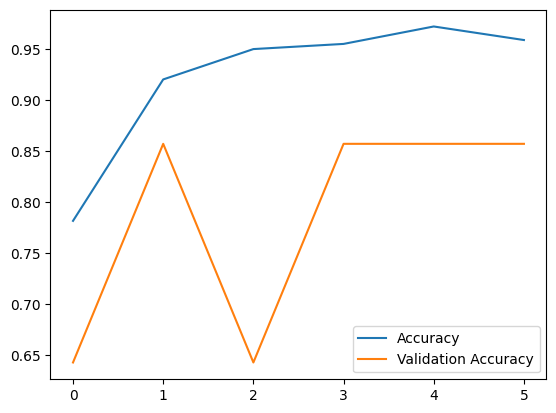

In [77]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [82]:
from google.colab import files
uploaded = files.upload()

Saving Imagen-3-N.jpeg to Imagen-3-N (1).jpeg


In [83]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Carga y preprocesa la imagen
img_path = 'Imagen-3-N.jpeg'  # Reemplaza con el nombre de tu imagen cargada
img = load_img(img_path, target_size=(150, 150))  # Redimensiona la imagen
img_array = img_to_array(img)  # Convierte a array
img_array = img_array / 255.0  # Normaliza
img_array = np.expand_dims(img_array, axis=0)  # Añade una dimensión para batch


In [84]:
# Predicción
prediction = model.predict(img_array)

# Interpreta el resultado
if prediction[0] > 0.5:  # Ajusta el umbral según tu modelo
    print("La radiografía indica: Neumonía")
else:
    print("La radiografía indica: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La radiografía indica: Neumonía


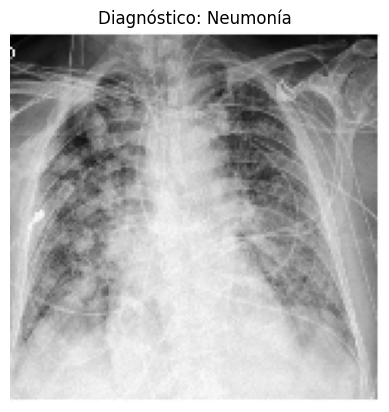

In [85]:
plt.imshow(img)
plt.title("Diagnóstico: Neumonía" if prediction[0] > 0.5 else "Diagnóstico: Normal")
plt.axis('off')
plt.show()